In [4]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
import pandas as pd

# Load the train and test datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Check the first few rows of the train dataset
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.info()
train_df.describe()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [7]:
# Check the basic info of the dataset
train_df.info()

# Get statistical summary of numerical columns
train_df.describe()

# Check for missing values
train_df.isnull().sum()

# Check the column names
train_df.columns

# Check unique values for categorical columns (optional)
for col in train_df.select_dtypes(include='object').columns:
    print(f"{col}: {train_df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Numerical columns (exclude target)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Categorical columns
cat_cols = train_df.select_dtypes(include='object').columns

# 1. Handle missing values

# Numerical columns → fill missing with median
num_imputer = SimpleImputer(strategy='median')
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

# Categorical columns → only if categorical columns exist
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])
    test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

    # Encode categorical variables
    le = LabelEncoder()
    for col in cat_cols:
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

# 2. Split features and target
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# 3. Optional: Split train into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}")


X_train: (1168, 80), X_val: (292, 80)
y_train: (1168,), y_val: (292,)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict on validation set
y_val_pred = rf_model.predict(X_val)

# 4. Evaluate the model (calculate RMSE manually)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

# 5. Predict on test dataset
test_predictions = rf_model.predict(test_df)
print("Test predictions ready!")


Validation RMSE: 29001.533674561608
Test predictions ready!


        Actual  Predicted
892   154500.0  141205.75
1105  325000.0  329461.89
413   115000.0  116977.12
522   159000.0  163771.90
1036  315500.0  318858.26
614    75500.0   84107.66
218   311500.0  216853.56
1160  146000.0  152215.17
649    84500.0   85451.49
887   135500.0  129060.14


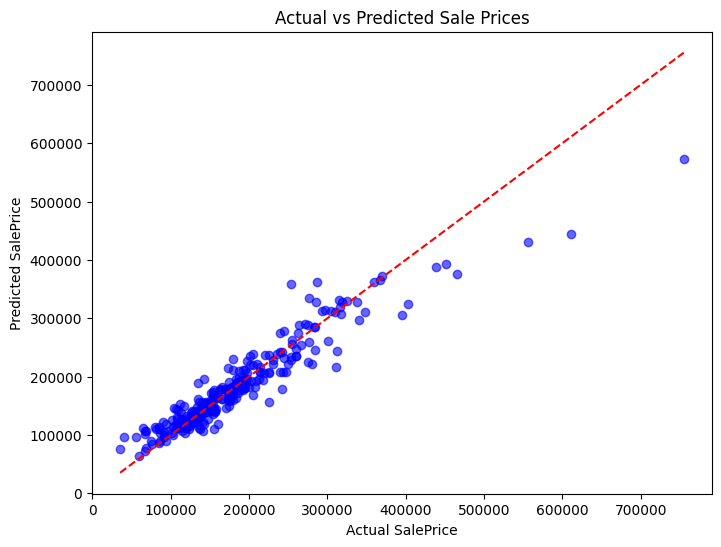

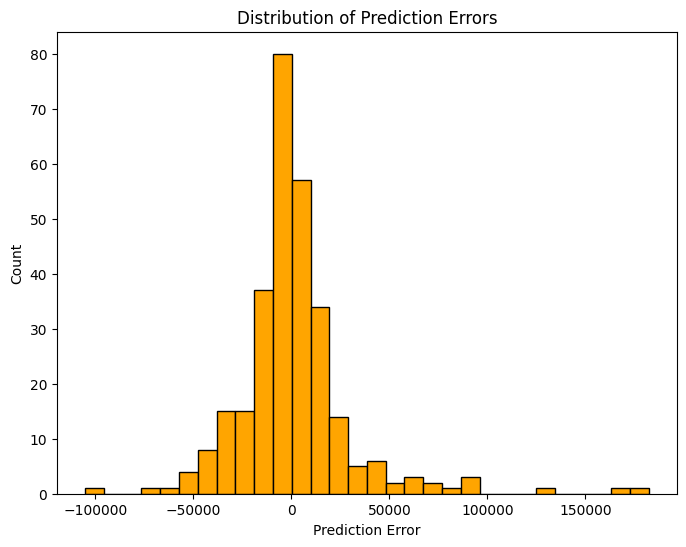

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with actual vs predicted
comparison = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_val_pred
})

# Show first 10 rows
print(comparison.head(10))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

# Optional: Distribution of errors
errors = y_val - y_val_pred
plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color='orange', edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()


        Actual  Predicted
892   154500.0  141205.75
1105  325000.0  329461.89
413   115000.0  116977.12
522   159000.0  163771.90
1036  315500.0  318858.26
614    75500.0   84107.66
218   311500.0  216853.56
1160  146000.0  152215.17
649    84500.0   85451.49
887   135500.0  129060.14


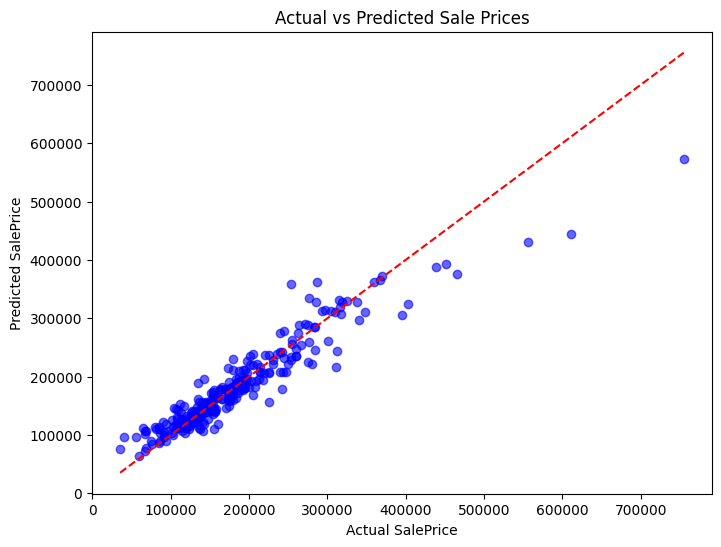

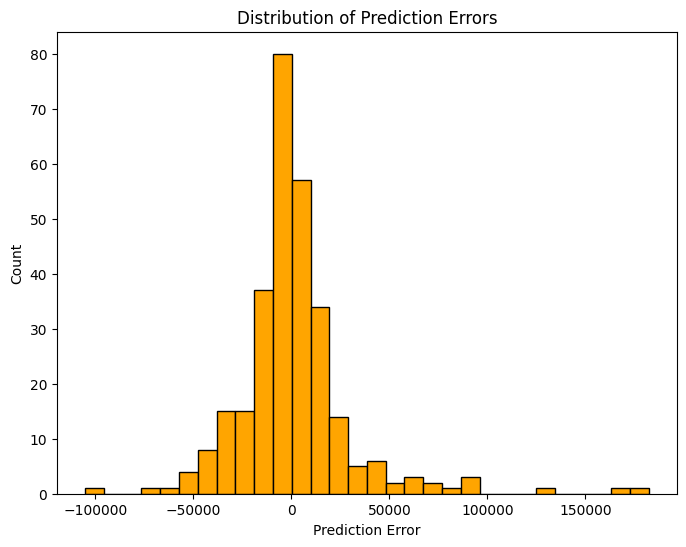

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with actual vs predicted
comparison = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_val_pred
})

# Show first 10 rows
print(comparison.head(10))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

# Optional: Distribution of errors
errors = y_val - y_val_pred
plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color='orange', edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()


In [16]:
import numpy as np

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Train model on log-transformed target
rf_model.fit(X_train, y_train_log)
y_val_pred_log = rf_model.predict(X_val)

# Convert predictions back
y_val_pred = np.expm1(y_val_pred_log)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE after log-transform: {rmse}")


Validation RMSE after log-transform: 29710.886198761982


In [17]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# -------------------------------
# 1. Preprocessing
# -------------------------------

# Numerical and categorical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
cat_cols = train_df.select_dtypes(include='object').columns

# Fill missing values
num_imputer = SimpleImputer(strategy='median')
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])
    test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

    # Encode categorical variables
    le = LabelEncoder()
    for col in cat_cols:
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

# -------------------------------
# 2. Feature Engineering
# -------------------------------

# Example features
train_df['TotalBath'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
test_df['TotalBath'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']

train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch']

train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

# Handle skewed numerical features
skewed_feats = ['LotArea', 'GrLivArea', 'TotalPorchSF']
for feat in skewed_feats:
    train_df[feat] = np.log1p(train_df[feat])
    test_df[feat] = np.log1p(test_df[feat])

# -------------------------------
# 3. Split features and target
# -------------------------------
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Optional: validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. Train XGBoost model
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict on validation
y_val_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

# -------------------------------
# 5. Predict on test set
# -------------------------------
test_predictions = xgb_model.predict(test_df)

# Save predictions
submission = pd.DataFrame({
    'Id': test_df.index,  # replace with test_df['Id'] if available
    'SalePrice': test_predictions
})
submission.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'")


Validation RMSE: 24225.199373702522
Predictions saved to 'house_price_predictions.csv'


In [18]:
from google.colab import files

# Download the predictions CSV
files.download('house_price_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>